# Прогноз успешных компьютерных игр на 2017 год 

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Передоставленны данные до 2016 года, и мы планируем кампанию на 2017-й.  
**Нужно выявить определяющие успешность игры закономерномти:**
* самые популярные платформы   
* самые популярные жанры    
* выявим влияет ли рейтинг ESRB  

**Цель исследования** - проверить гипотезы:

1. Сравнить средние прользовательские рейтинги платформ Xbox One и PC
2. Сравнить средние пользовательские рейтинги жанров Action и Sports  

Данные за 2016 год могут быть неполными.

## Обзор данных

In [1]:
# загрузим библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
game = pd.read_csv("games.csv") #прочитаем csv-файл

In [3]:
display(game.head()) #выведем первые стрроки датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
game.info() #выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов. Тип данных в столбце Year_of_Release (год выпуска) нужно будет заменить на int. Тип данных в столбце User_Score (оценка пользователей) нужно будет заменить на float.  

Согласно документации к данным:  
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Количество значений в столбцах различается. Значит в данных есть пропущенные значения.  
В названиях колонок строчные буквы сочетаются с прописными.  

**Выводы**  
В каждой строке таблицы - данные об игре. Часть колонок описывает саму игру: название, платформа, год выпуска, жанр игры. Остальные данные рассказывают о продажах в разных странах (Северная Америка, Европа, Япония и др. страны), а также о оценке критиков, пользователей и рейтинге ESRB.  

Предворительно можно сказать, что данных достаточно для проверки гипотез. Но встречаются пропуски данных, а в названиях колонок расхождения с хорошим стилем.

## Предобработка данных

In [5]:
game.columns = game.columns.str.lower() #приведем названия столбцов к нижнему регистру
display(game.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#проверим на наличие дубликатов
game.duplicated(['name', 'platform', 'year_of_release']).sum()

2

In [7]:
# выведем дубликаты
display(game[game.duplicated(['name', 'platform', 'year_of_release'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [8]:
# удалим дубликаты
game = game.drop_duplicates(['name', 'platform', 'year_of_release'])

In [9]:
game['genre'].unique() #проверим уникальные названия жанров

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
game.isna().sum() #подсчитаем пропуски

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Уберем пропуски в столбце year_of_release и genre, так как их не существенно много, но отсутсвие их значений могут оказать значительное влияние на точность аналитических данных по жанру и по годам выпуска. Появление пропусков в данных столбцах может быть связано с человеческим фактором (забыли указать при заведении данных), плюс отсутствие ресурсов на сбор информации (время, деньги).  
Пропуски в столбцах critic_score, user_score, rating может быть связано с тем что это старые игры и в рейтингах они не учавствовали и оценок не получали.
В столбце user_score аббревиатура tbd значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому предлагаю заменить tbd на NaN

In [11]:
# выведем строки с отсутствующими значениями
null_data = game.loc[(game['year_of_release'].isna()) & (game['genre'].isna())].sort_values(by='na_sales', ascending=False)
null_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [12]:
# 
game = game.dropna(subset=['year_of_release', 'genre'])
game['user_score'] = game['user_score'].replace('tbd', 'NaN')
game.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [13]:
# заменим типы данных в отдельных столбцах
game['user_score'] = pd.to_numeric(game['user_score'], errors='coerce')
game['year_of_release'] = game['year_of_release'].astype(int, errors='ignore')
game.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [14]:
#добавим в таблицу стобец с суммарной продажи по всем регионам
game['total_sales'] = game[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis = 1)
display(game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [15]:
# выведем основную информацию
game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Таким образом в представленном датасете 11 столбцов и 16443 строк, в столбцах critic_score, user_score, rating есть пропущенные занчения.

## Исследовательский анализ

### Рассмотрим сколько игр выпускалось в разные годы

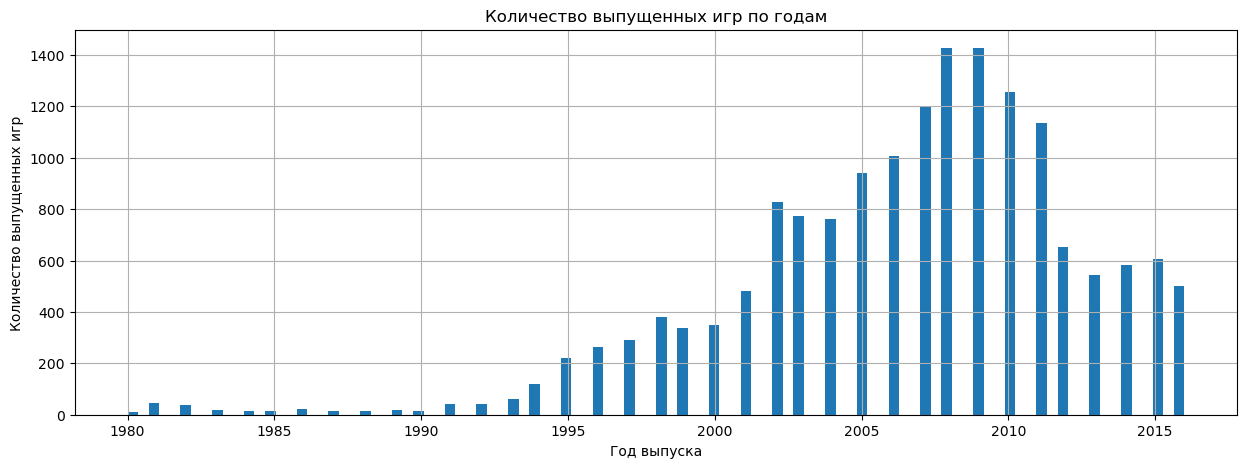

In [16]:
game['year_of_release'].hist(bins=100, figsize=(15, 5))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

Из графика видно что наиболее активный период выпуска игр начинается с 1995 года, поэтому очистим данные от прошлых лет. В промежуток времени с 2007 по 2012 выпускалось наибольшее число игр. Для целей анализа и погноза на 2017 год, нам актуальны данные за 2014 - 2016 гг в это время мы видим спад спроса на игры.

In [17]:
game = game.drop(index=game.query('year_of_release < 1990').index)

### Рассмотрим как менялись продажи по платформам  
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы

In [18]:
# выберем платформы с наибольшими суммарными продажами
platform_sales = game.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.69
XB       251.57
N64      218.01
SNES     200.04
GC       196.73
GB       188.03
XOne     159.32
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
NES       27.54
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

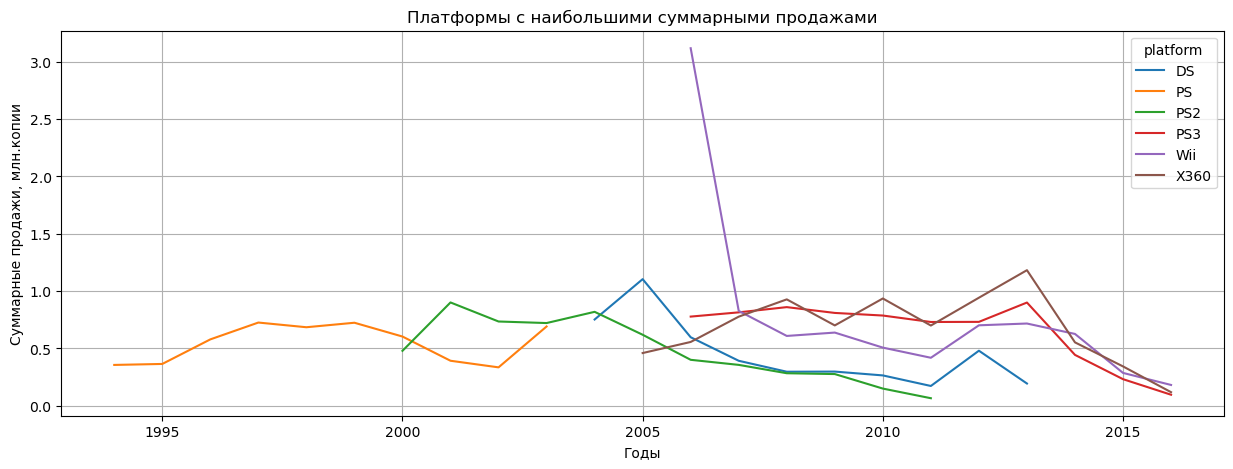

In [19]:
#построим график по плаформам с наибольшими суммарными продажами
favarit_game = game.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales')\
.plot(grid=True, figsize=(15, 5))
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи, млн.копии')
plt.show();

Как видно из таблицы средний "срок жизни" платформы примерно 10 лет. Для нас актуальны данные за последние годы 2014-2016гг. Несмотря на общее падение спроса на компьютерные игры, в последние 3 года сохранились продажи наиболее популярных у пользователей платформ X360, PS3, Wii.

### Рассмотрим платформы лидеры продаж 2014-2016

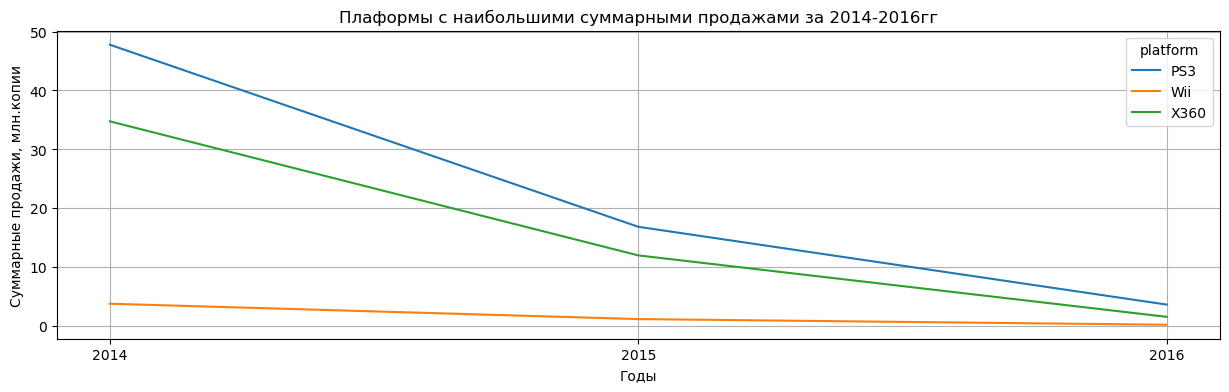

In [20]:
#построим график по плаформам с наибольшими суммарными продажами за 2014-2016гг
top_game = game.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"] and \
                               year_of_release == [2014, 2015, 2016]')\
               .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
               .plot(grid=True, figsize=(15, 4))
plt.title('Плаформы с наибольшими суммарными продажами за 2014-2016гг')
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи, млн.копии')

plt.xticks(np.arange(2014, 2017, 1))
plt.show();

In [21]:
# сделаем срез по платформам имеющим наибольшие продажи 
#на основании этих данных построим диаграмму размаха
top_game = game.query('year_of_release > 2014')
top_game = top_game.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
top_game.describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,132.000000,104.000000,111.000000,301.000000,3.000000,195.000000,5.000000,42.00000,48.000000,167.000000
mean,0.325152,0.132404,0.183964,0.625083,0.040000,0.053846,0.264000,0.49881,0.280833,0.516707
std,0.798620,0.209449,0.342696,1.457063,0.034641,0.063669,0.390487,0.85024,0.381207,0.965940
min,0.010000,0.010000,0.010000,0.010000,0.020000,0.010000,0.010000,0.01000,0.010000,0.010000
25%,0.030000,0.020000,0.020000,0.050000,0.020000,0.020000,0.030000,0.05000,0.040000,0.035000
50%,0.090000,0.050000,0.060000,0.120000,0.020000,0.030000,0.150000,0.21500,0.110000,0.130000
75%,0.232500,0.142500,0.160000,0.420000,0.050000,0.060000,0.180000,0.51750,0.352500,0.555000
max,7.140000,1.280000,2.700000,14.630000,0.080000,0.410000,0.950000,4.44000,1.700000,7.390000


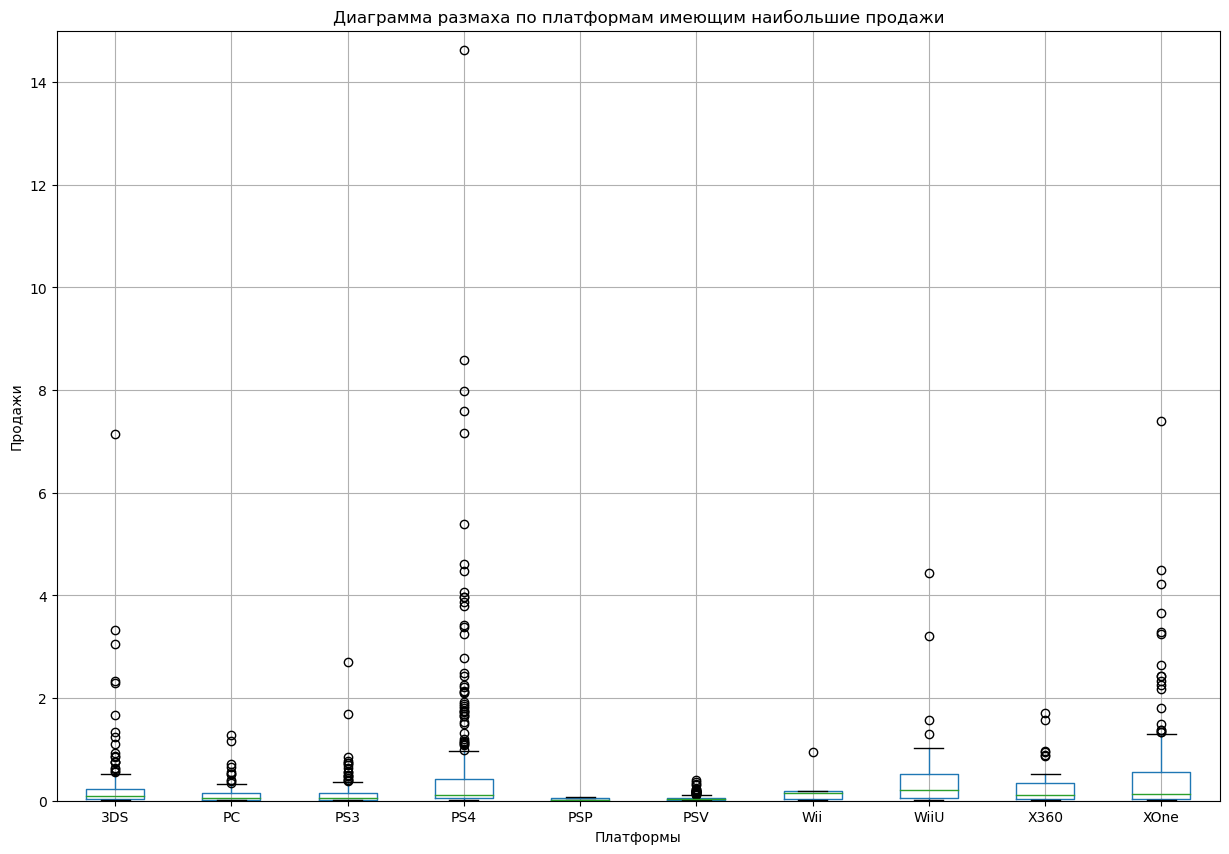

In [22]:
top_game.boxplot(figsize=(15, 10))
plt.ylim(0, 15)
plt.title('Диаграмма размаха по платформам имеющим наибольшие продажи')
plt.xlabel('Платформы')
plt.ylabel('Продажи');

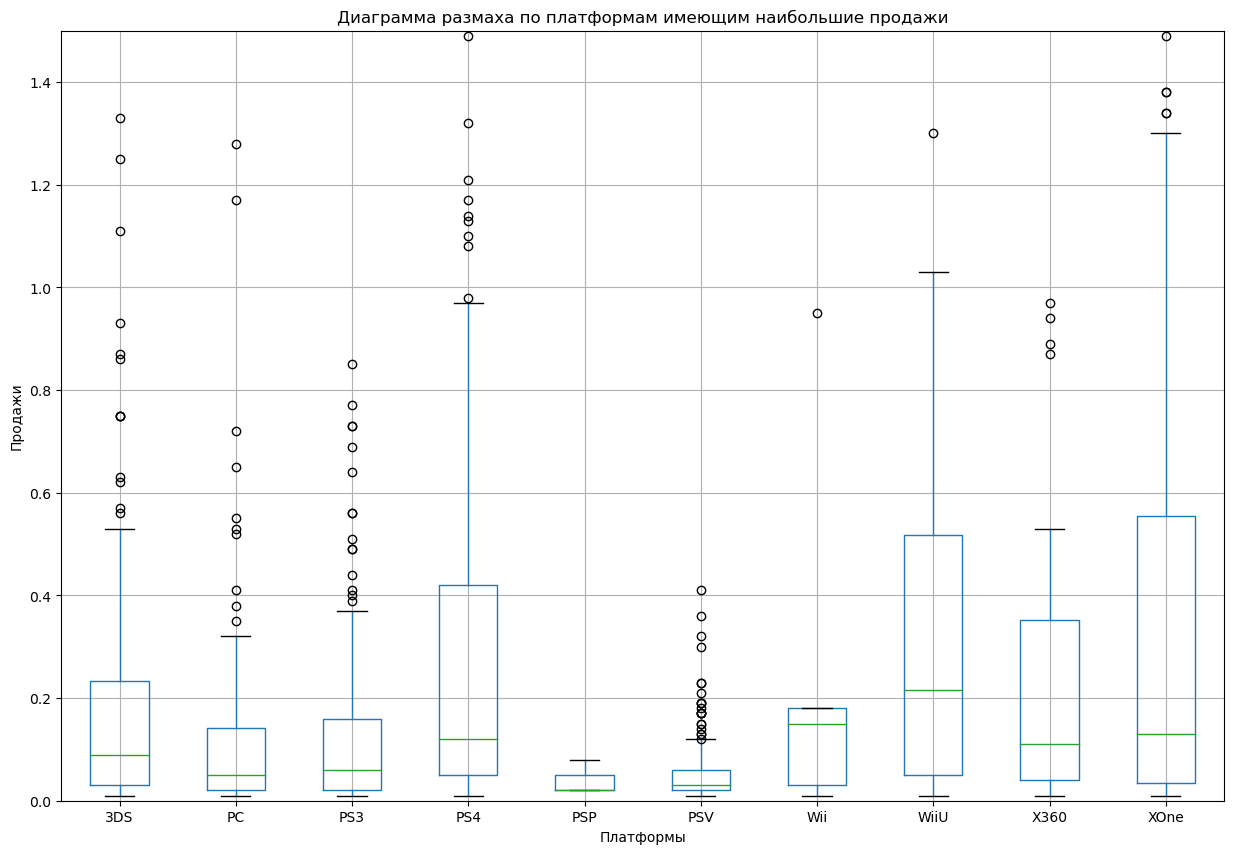

In [23]:
top_game.boxplot(figsize=(15, 10))
plt.ylim(0, 1.5)
plt.title('Диаграмма размаха по платформам имеющим наибольшие продажи')
plt.xlabel('Платформы')
plt.ylabel('Продажи');

Наибольшие медианные продажи у платформ WiiU - 215 тыс. проданых копий. Больше всего продаж было у платформы  PS4, WiiU и XOne. На диаграмме размаха также видно что присутствуют выбросы, возможно это связано с рекламными акциями.

### Зависимость продаж от оценки пользователей и критиков

Посмотрим, как влияют на продажи популярных платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Корреляция между общими продажами и оценкой критиков составляет: 0.18


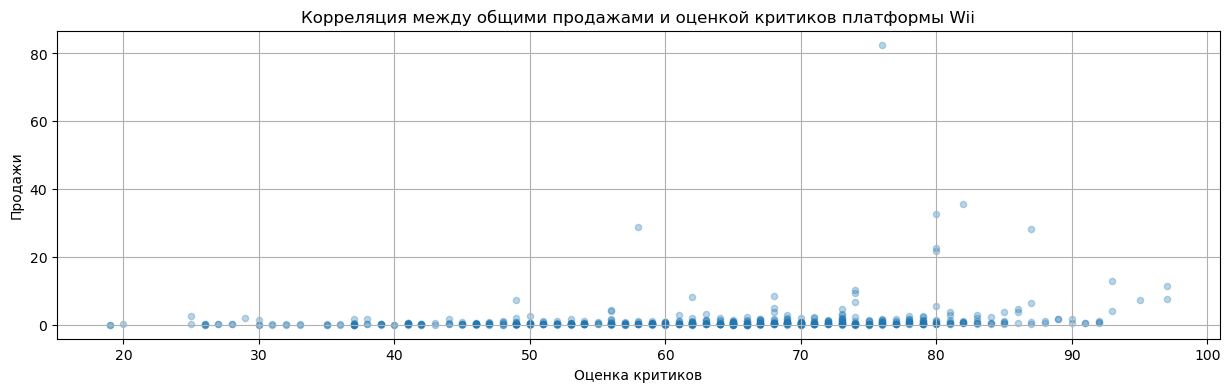

In [24]:
game_wii_critic_score = game.query('platform == "Wii"').dropna(subset=['critic_score'])
print('Корреляция между общими продажами и оценкой критиков составляет:', 
      game_wii_critic_score['critic_score'].corr(game_wii_critic_score['total_sales']).round(2))
game_wii_critic_score.plot(x='critic_score', 
                           y='total_sales', 
                           kind='scatter', 
                           alpha=0.3, 
                           grid=True, 
                           figsize=(15, 4))
plt.title('Корреляция между общими продажами и оценкой критиков платформы Wii')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Корреляция между общими продажами и оценкой пользователей составляет: 0.11


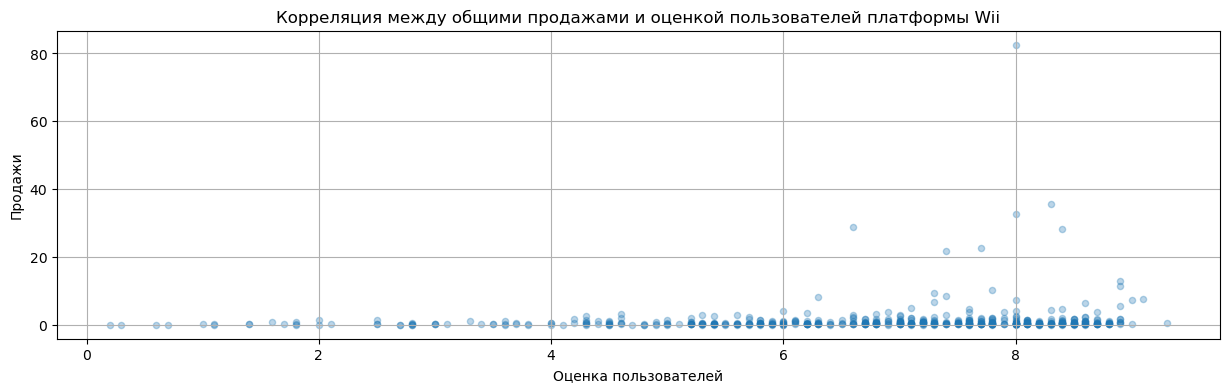

In [25]:
game_wii_user_score = game.query('platform == "Wii"').dropna(subset=['user_score'])
print('Корреляция между общими продажами и оценкой пользователей составляет:', 
      game_wii_user_score['user_score'].corr(game_wii_user_score['total_sales']).round(2))
game_wii_user_score.plot(x='user_score', 
                         y='total_sales', 
                         kind='scatter', 
                         alpha=0.3, 
                         grid=True, 
                         figsize=(15, 4))

plt.title('Корреляция между общими продажами и оценкой пользователей платформы Wii')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

В случае с продажами игр платформы Wii мы видим слабую полижительную взаимосвзь, т.е. в целом с ростом высоких оценок пользователей и критиков растут и продажи.

Корреляция между общими продажами и оценкой критиков составляет: 0.39


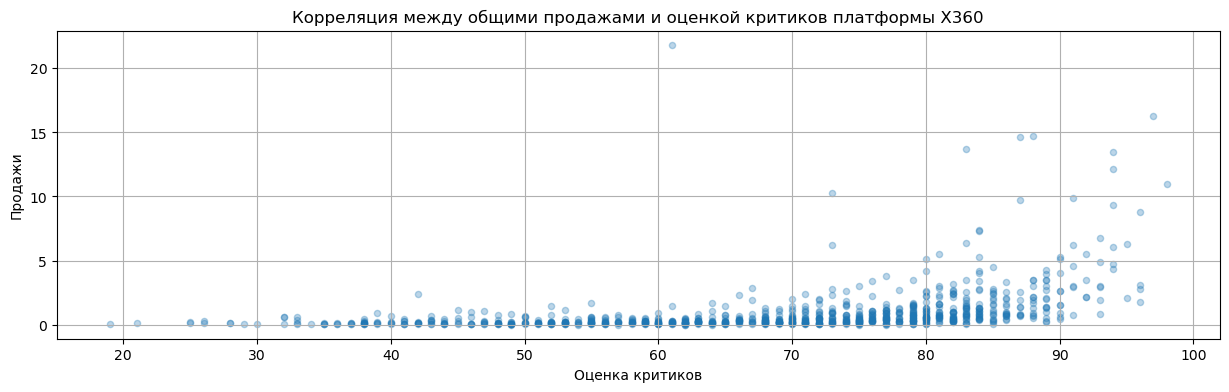

In [26]:
game_X360_critic_score = game.query('platform == "X360"').dropna(subset=['critic_score'])
print('Корреляция между общими продажами и оценкой критиков составляет:', 
      game_X360_critic_score['critic_score'].corr(game_X360_critic_score['total_sales']).round(2))
game_X360_critic_score.plot(x='critic_score', 
               y='total_sales', 
               kind='scatter', 
               alpha=0.3, 
               grid=True, 
               figsize=(15, 4))
plt.title('Корреляция между общими продажами и оценкой критиков платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Корреляция между общими продажами и оценкой пользователей составляет: 0.11


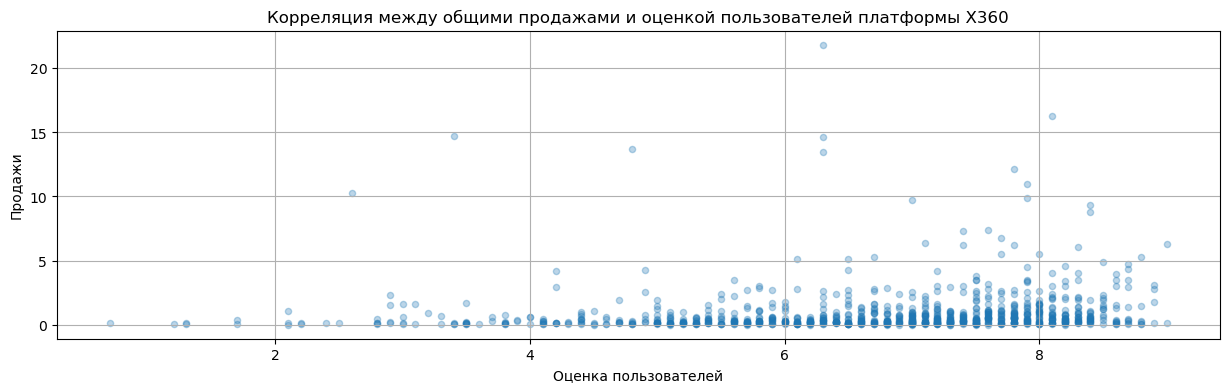

In [27]:
game_X360_user_score = game.query('platform == "X360"').dropna(subset=['user_score'])
print('Корреляция между общими продажами и оценкой пользователей составляет:', 
      game_X360_user_score['user_score'].corr(game_X360_user_score['total_sales']).round(2))
game_X360_user_score.plot(x='user_score', 
                            y='total_sales', 
                            kind='scatter', 
                            alpha=0.3, 
                            grid=True, 
                            figsize=(15, 4))
plt.title('Корреляция между общими продажами и оценкой пользователей платформы X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

В случае с продажами игр платформы X360 мы видим слабую полижительную взаимосвзь продаж с оценкой пользователей, оценки критиков повлияли на продажи сильнее, и также как в предыдущей платформе в целом с ростом высоких оценок пользователей и критиков растут и продажи.

Корреляция между общими продажами и оценкой критиков составляет: 0.43


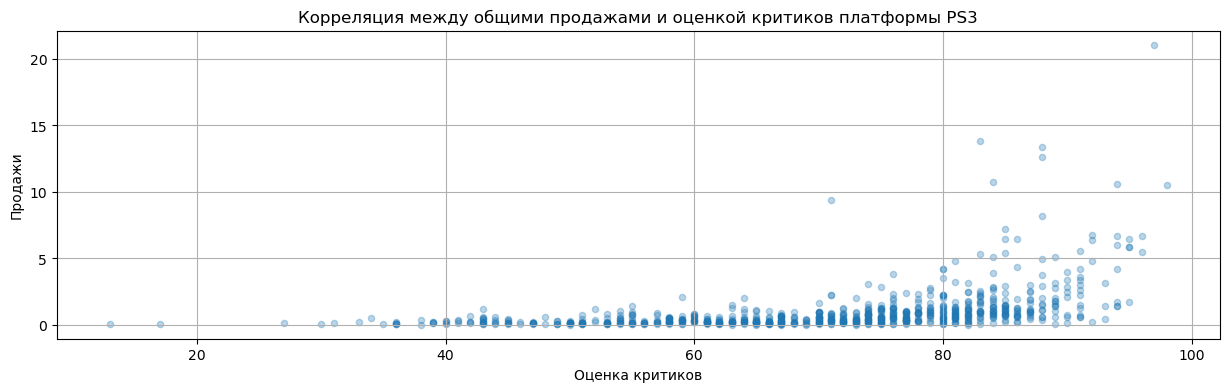

In [28]:
game_PS3_critic_score = game.query('platform == "PS3"').dropna(subset=['critic_score'])
print('Корреляция между общими продажами и оценкой критиков составляет:', 
      game_PS3_critic_score['critic_score'].corr(game_PS3_critic_score['total_sales']).round(2))
game_PS3_critic_score.plot(x='critic_score', 
              y='total_sales', 
              kind='scatter', 
              alpha=0.3, 
              grid=True, 
              figsize=(15, 4))
plt.title('Корреляция между общими продажами и оценкой критиков платформы PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show();

Корреляция между общими продажами и оценкой пользователей составляет: 0.13


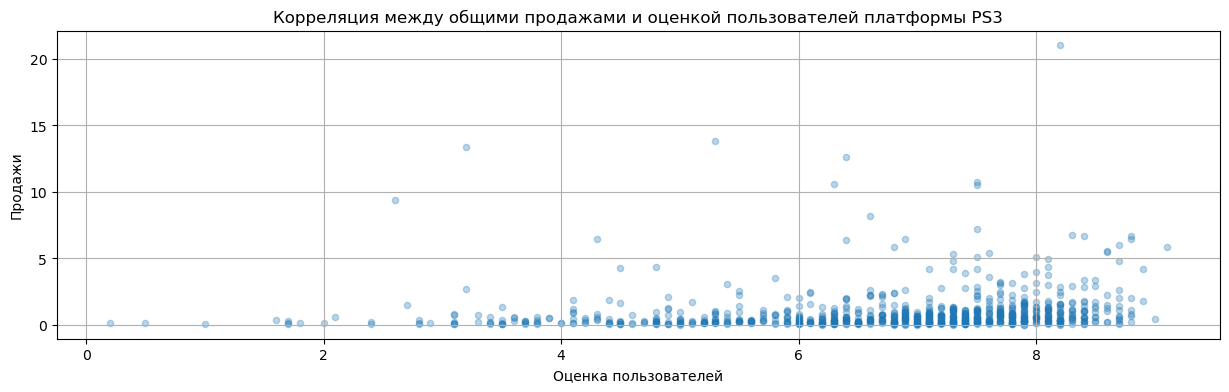

In [29]:
game_PS3_user_score = game.query('platform == "PS3"').dropna(subset=['user_score'])
print('Корреляция между общими продажами и оценкой пользователей составляет:', 
      game_PS3_user_score['user_score'].corr(game_PS3_user_score['total_sales']).round(2))
game_PS3_user_score.plot(x='user_score', 
              y='total_sales', 
              kind='scatter', 
              alpha=0.3, 
              grid=True, 
              figsize=(15, 4))
plt.title('Корреляция между общими продажами и оценкой пользователей платформы PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show();

С продажами игр платформы PS3 также как и на платформе X360 мы видим слабую полижительную взаимосвзь продаж с оценкой пользователей, оценки критиков повлияли на продажи сильнее, и также как в предыдущих платформах в целом с ростом высоких оценок пользователей и критиков растут и продажи. Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных)
Достаточно много игр с высокой оценкой критиков и слабой выручкой.

### Посмотрим на общее распределение игр по жанрам

In [30]:
top_genre = game.query('year_of_release > 2014')
top_genre_pivot = top_genre.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
display(top_genre_pivot)

,total_sales
genre,
Shooter,105.73
Action,102.13
Sports,64.33
Role-Playing,55.82
Misc,14.17
Fighting,12.37
Adventure,11.98
Racing,10.86
Platform,9.28


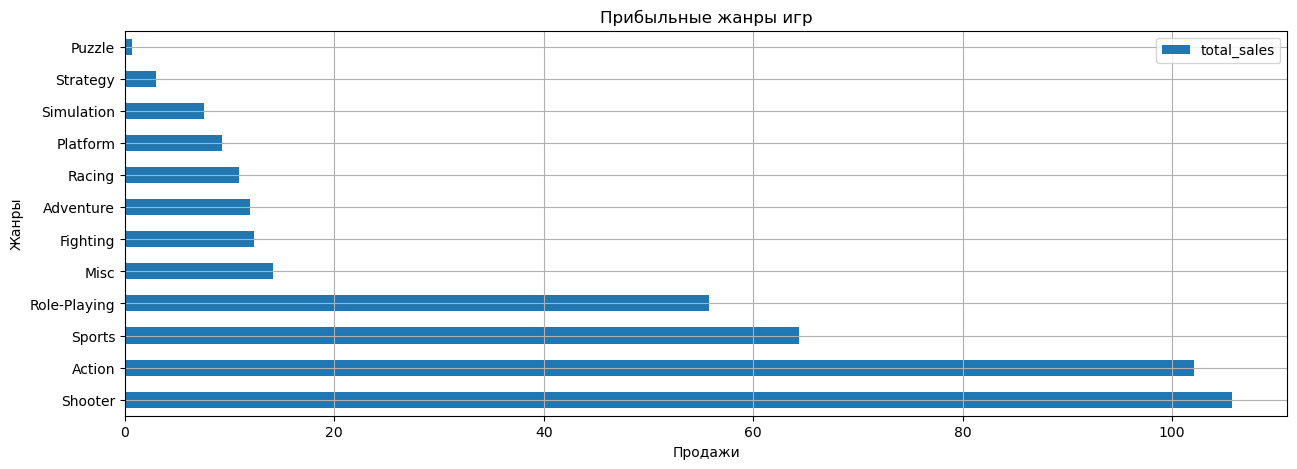

In [31]:
# построим графих распределения игр по жанрам
top_genre_pivot.plot(kind='barh', grid=True, figsize=(15, 5))
plt.title('Прибыльные жанры игр')
plt.xlabel('Продажи')
plt.ylabel('Жанры')
plt.show();

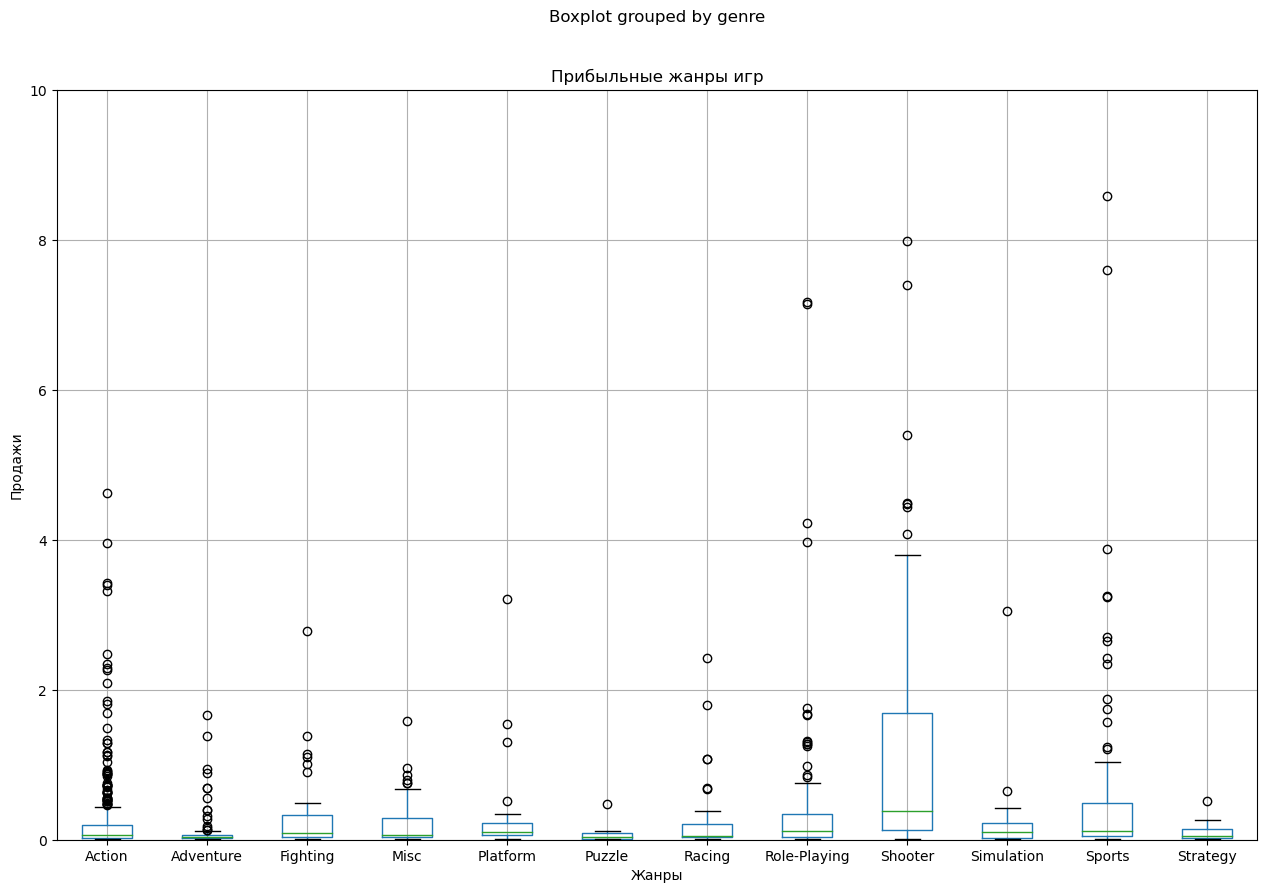

In [32]:
# построим диаграмму размаха игр по жанрам
game.query('year_of_release > 2014').boxplot('total_sales', by='genre', figsize=(15, 10))
plt.ylim(0, 10)
plt.title('Прибыльные жанры игр')
plt.xlabel('Жанры')
plt.ylabel('Продажи');

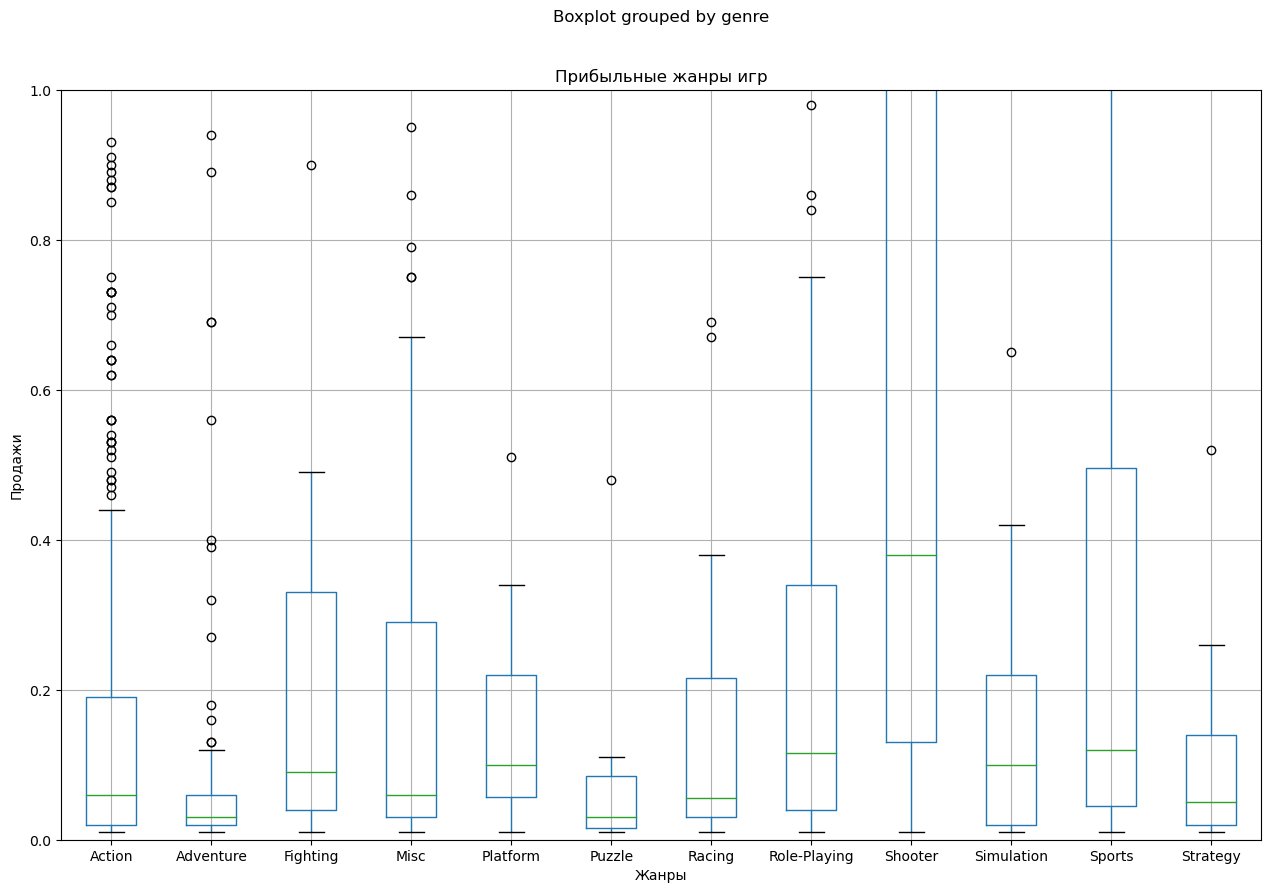

In [33]:
game.query('year_of_release > 2014').boxplot('total_sales', by='genre', figsize=(15, 10))
plt.ylim(0, 1)
plt.title('Прибыльные жанры игр')
plt.xlabel('Жанры')
plt.ylabel('Продажи');

In [34]:
game.query('year_of_release > 2014').groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,431.0,0.236961,0.525858,0.01,0.0200,0.060,0.190,4.62
Adventure,110.0,0.108909,0.254260,0.01,0.0200,0.030,0.060,1.66
Fighting,37.0,0.334324,0.549695,0.01,0.0400,0.090,0.330,2.78
Misc,71.0,0.199577,0.286718,0.01,0.0300,0.060,0.290,1.58
Platform,28.0,0.331429,0.667387,0.01,0.0575,0.100,0.220,3.21
Puzzle,7.0,0.102857,0.170070,0.01,0.0150,0.030,0.085,0.48
Racing,42.0,0.258571,0.497342,0.01,0.0300,0.055,0.215,2.42
Role-Playing,132.0,0.422879,1.028082,0.01,0.0400,0.115,0.340,7.17
Shooter,81.0,1.305309,2.227297,0.01,0.1300,0.380,1.690,14.63


Судя по количеству выбросов, жанры игр, которые принесли максимум выручки , Shooter (14.63 млн. продаж), Sports(8.58 млн. продаж) и Role-Playing (7.17 млн. продаж), значит игры данных жанров могут быть наиболее привлекательны для игроманов.  
Сравнивая медианные продажи по жанрам наиболее стабильны продажи игры жанров: Shooter (0,38 млн. продаж) и Role-Playing	(0.115 млн. продаж). Меньшим спросом пользуются жанры игр Adventure и Puzzle (по 30 млн.продаж).

## Составим портрет пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователя каждого региона

In [35]:
top_5_na = game.query('year_of_release  == [2014, 2015, 2016]')\
.pivot_table(index='platform', values=['na_sales'], aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).reset_index()

top_5_na_other = top_5_na[5:]
top_5_na_other = top_5_na_other._append({'platform': 'Other',
                                        'na_sales': top_5_na['na_sales'].sum()
                                        -top_5_na['na_sales'][5:].sum()}, 
                                       ignore_index = True)

top_5_na_other

,platform,na_sales
0,WiiU,19.36
1,PC,7.23
2,PSV,2.52
3,Wii,2.08
4,PSP,0.00
5,Other,252.87


In [36]:
top_5_eu = game.query('year_of_release  == [2014, 2015, 2016]')\
.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).reset_index()

top_5_eu_other = top_5_eu[5:]
top_5_eu_other = top_5_eu_other._append({'platform': 'Other',
                                        'eu_sales': top_5_eu['eu_sales'].sum()
                                        -top_5_eu['eu_sales'][5:].sum()}, 
                                       ignore_index = True)

top_5_eu_other

,platform,eu_sales
0,X360,15.49
1,WiiU,13.15
2,PSV,3.53
3,Wii,2.59
4,PSP,0.00
5,Other,235.92


In [37]:
top_5_jp = game.query('year_of_release == [2014, 2015, 2016]')\
.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum')\
.sort_values(by = 'jp_sales', ascending = False).reset_index()
top_5_jp_other = top_5_jp[5:]
top_5_jp_other = top_5_jp_other._append({'platform': 'Other',
                                        'jp_sales': top_5_jp['jp_sales'].sum()
                                        -top_5_jp['jp_sales'][5:].sum()}, 
                                       ignore_index = True)
top_5_jp_other

,platform,jp_sales
0,PSP,0.36
1,XOne,0.32
2,X360,0.08
3,PC,0.00
4,Wii,0.00
5,Other,92.33


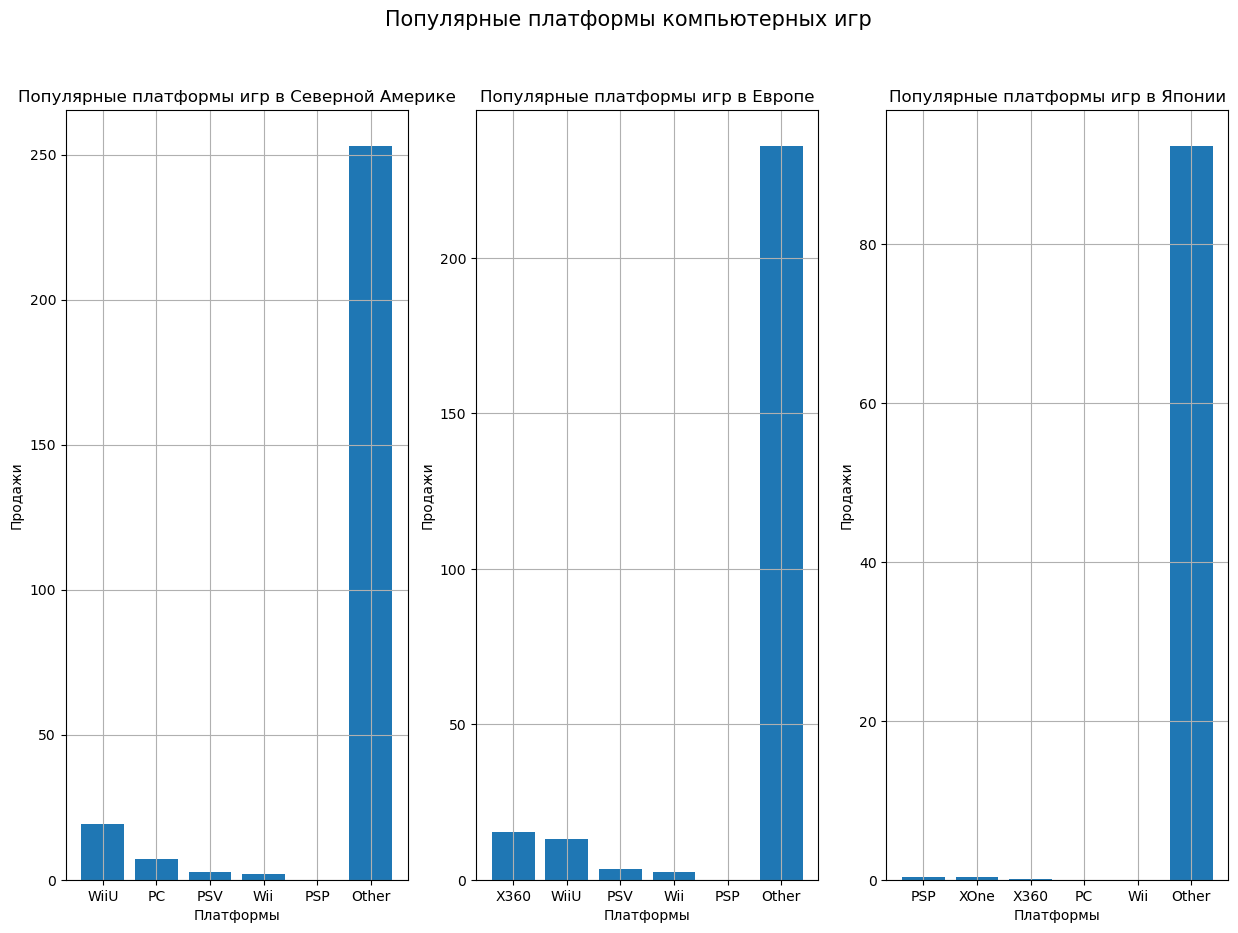

In [38]:
plt.figure(figsize=(15, 10))
plt.suptitle('Популярные платформы компьютерных игр', fontsize=15)

plt.subplot(131)
plt.title('Популярные платформы игр в Северной Америке')
plt.bar(top_5_na_other.platform, top_5_na_other.na_sales)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.grid(True)

plt.subplot(132)
plt.title('Популярные платформы игр в Европе')
plt.bar(top_5_eu_other.platform, top_5_eu_other.eu_sales)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.grid(True)

plt.subplot(133)
plt.title('Популярные платформы игр в Японии')
plt.bar(top_5_jp_other.platform, top_5_jp_other.jp_sales)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.grid(True)

В Северной Америке самыми популярными платформами оказались: WiiU, PC, PSV, Wii, PSP.  
В Европе самыми популярными платформами оказались: X360, WiiU, PSV, Wii, PSP.  
В Японии самыми популярными платформами оказались: PSP, XOne, X360, PC, Wii.  

### Самые популярные жанры (топ-5) для пользователя каждого региона

In [39]:
top_5_na_genre = game.query('year_of_release == [2014, 2015, 2016]')\
.pivot_table(index='genre', values=['na_sales'], aggfunc='sum')\
.sort_values(by = 'na_sales', ascending = False).reset_index()

top_5_na_other_genre = top_5_na_genre[7:]
top_5_na_other_genre = top_5_na_other_genre._append({'genre': 'Other',
                                        'na_sales': top_5_na_genre['na_sales'].sum()
                                        -top_5_na_genre['na_sales'][7:].sum()}, 
                                       ignore_index = True)

top_5_na_other_genre

,genre,na_sales
0,Platform,6.79
1,Adventure,5.64
2,Simulation,2.63
3,Strategy,0.98
4,Puzzle,0.65
5,Other,267.37


In [40]:
top_5_eu_genre = game.query('year_of_release == [2014, 2015, 2016]')\
.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum')\
.sort_values(by = 'eu_sales', ascending = False).reset_index()
top_5_eu_other_genre = top_5_eu_genre[7:]
top_5_eu_other_genre = top_5_eu_other_genre._append({'genre': 'Other',
                                        'eu_sales': top_5_eu_genre['eu_sales'].sum()
                                        -top_5_eu_genre['eu_sales'][7:].sum()}, 
                                       ignore_index = True)\

top_5_eu_other_genre

,genre,eu_sales
0,Platform,6.80
1,Fighting,6.69
2,Adventure,6.49
3,Strategy,1.79
4,Puzzle,0.52
5,Other,248.39


In [41]:
top_5_jp_genre = game.query('year_of_release == [2014, 2015, 2016]')\
.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum')\
.sort_values(by = 'jp_sales', ascending = False).reset_index()
top_5_jp_other_genre = top_5_jp_genre[7:]
top_5_jp_other_genre = top_5_jp_other_genre._append({'genre': 'Other',
                                        'jp_sales': top_5_jp_genre['jp_sales'].sum()
                                        -top_5_jp_genre['jp_sales'][7:].sum()}, 
                                       ignore_index = True)\

top_5_jp_other_genre

,genre,jp_sales
0,Platform,2.69
1,Simulation,2.31
2,Racing,1.76
3,Strategy,0.95
4,Puzzle,0.93
5,Other,84.45


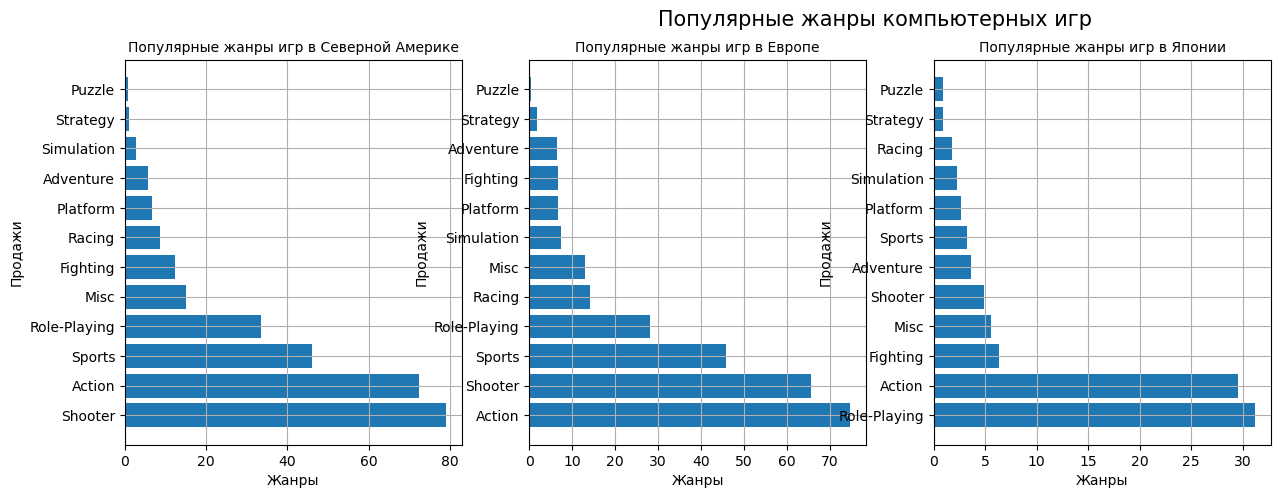

In [42]:
plt.figure(figsize=(20, 5))
plt.suptitle('Популярные жанры компьютерных игр', fontsize=15)

plt.subplot(141)
plt.title('Популярные жанры игр в Северной Америке', fontsize=10)
plt.barh(top_5_na_genre.genre, top_5_na_genre.na_sales)
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.grid(True)

plt.subplot(142)
plt.title('Популярные жанры игр в Европе', fontsize=10)
plt.barh(top_5_eu_genre.genre, top_5_eu_genre.eu_sales)
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.grid(True)


plt.subplot(143)
plt.title('Популярные жанры игр в Японии', fontsize=10)
plt.barh(top_5_jp_genre.genre, top_5_jp_genre.jp_sales)
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.grid(True)  

В Северной Америке самыми популярными жанрами игр оказались: Shooter, Action, Sports, Role-Playing, Misc.  
В Европе самыми популярными жанрами игр оказались: Action, Sports, Shooter, Role-Playing, Racing.  
В Японии самыми популярными жанрами игр оказались: Role-Playing, Action, Fighting, Misc, Shooter.  
В других странах самыми популярными жанрами игр оказались: Action, Sports, Shooter, Role-Playing, Misc.

### Влияние рейтинга ESRB на продажи в отдельном регионе

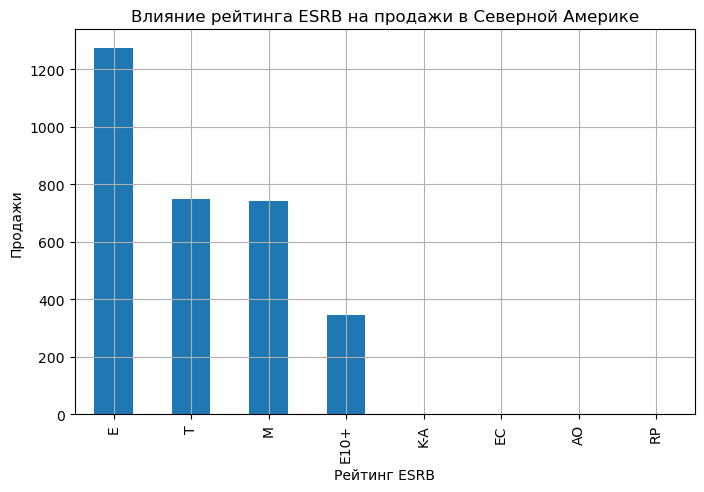

In [43]:
game.groupby('rating')['na_sales'].sum().sort_values(ascending=False)\
.plot(kind='bar', grid=True, figsize=(8, 5))
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг ESRB');

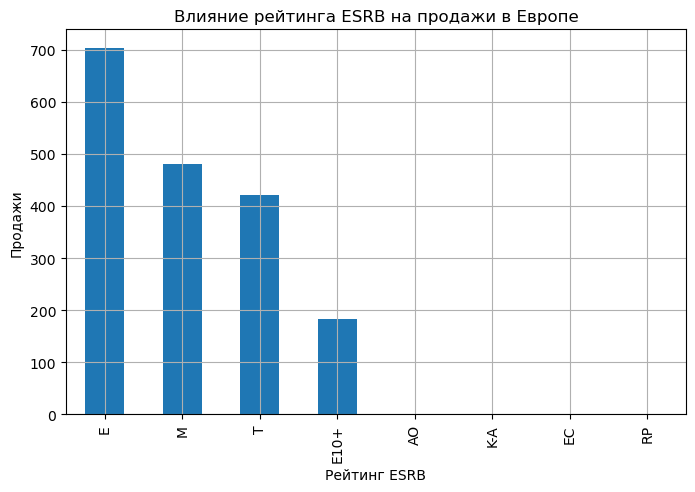

In [44]:
game.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)\
.plot(kind='bar', grid=True, figsize=(8, 5))
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг ESRB');

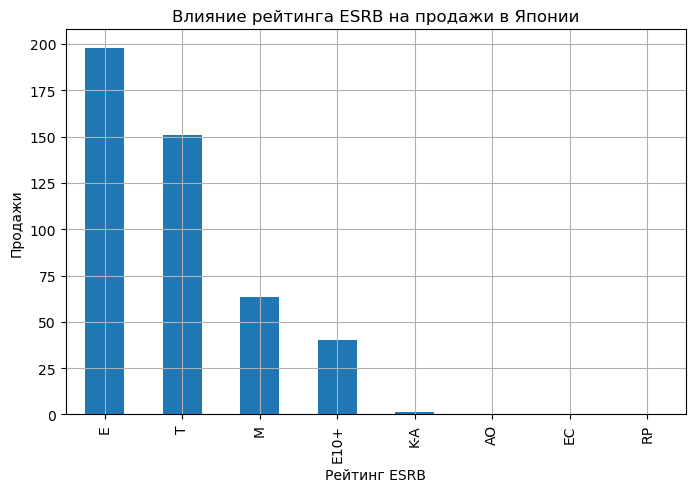

In [45]:
game.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)\
.plot(kind='bar', grid=True, figsize=(8, 5))
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг ESRB');

Дадим не большую расшифровку рейтингов игр по возрасту:  
«EC» — «Для детей младшего возраста»  
«E» — «Для всех»  
«E10+» — «Для всех от 10 лет и старше»  
«T» — «Подросткам»  
«M» — «Для взрослых»  
«AO» — «Только для взрослых»  
«RP» — «Рейтинг ожидается»  

Для всех регионов с разницей по объему продаж, большая часть выручки получена с игр с рейтингом "Для всех", затем "Для взрослых", далее "Для подростков".

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковы  
Альтернитивная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные

In [47]:
# очистим от пропусков столбец с оценками пользователей по каждой платформе
score_XOne = game[game['platform']=="XOne"]['user_score'].dropna()
score_PC = game[(game['platform']=="PC") & (game['year_of_release']>2013)]['user_score'].dropna()

In [48]:
alpha = 0.05
results = st.ttest_ind(score_XOne, 
                       score_PC, 
                       equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.22941056610446037
Не получилось отвергнуть нулевую гипотезу


Таким образом, не получилось отвергнуть нулевую гипотезу, полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC разные и с вероятностью почти 23% такое различие можно получить случайно.

### Средние пользовательские рейтинги жанров Action и Sports разные  

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые  
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

In [49]:
# очистим от пропусков столбец с оценками пользователей по каждому жанру
score_action = game[game['genre']=="Action"]['user_score'].dropna()
score_sports = game[game['genre']=="Sports"]['user_score'].dropna()

In [50]:
alpha = 0.05
results = st.ttest_ind(score_action, 
                       score_sports, 
                       equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07751671595536253
Не получилось отвергнуть нулевую гипотезу


Таким образом, не получилось отвергнуть нулевую гипотезу, полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports разные и с вероятностью в 77% такое различие можно получить случайно. 

## Общий вывод

В данной работе нам нужно было выявить определяющие успешность игры закономерномти.  

На этапе предобработки были проведены следующие действия: устранение пропусков из столбцов year_of_release и genre, замена типа данных в столбцах user_score и year_of_release', а также добавление стобца с суммарной выручкой по всем регионам.  

На этапе исспедовательского анализа данных мы увидели:  

1. Наиболее активный период выпуска игр начинается с 1995 г. В промежуток времени с 2007 по 2012 выпускалось наибольшее число игр. Для целей анализа и погноза на 2017 год, нам актуальны данные за последние годы 2014 - 2016 гг в это время мы видим спад спроса на компьютерные игры.  

2.  Средний "срок жизни" платформы примерно 10 лет. Для нас актуальны данные за последние годы 2014-2016гг. Лидерами продаж за последние годы, несмотря на общее падение спроса на игры, стали X360, PS3, Wii.  

3.   Судя по количеству выбросов, жанры игр, которые принесли максимум выручки , Shooter (14.63 млн. продаж), Sports(8.58 млн. продаж) и Role-Playing (7.17 млн. продаж), значит игры данных жанров могут быть наиболее привлекательны для игроманов.
4. Сравнивая медианные продажи по жанрам наиболее стабильны продажи игры жанров: Shooter (0,38 млн. продаж) и Role-Playing (0.115 млн. продаж). Меньшим спросом пользуются жанры игр Adventure и Puzzle (по 30 млн.продаж).

5. В целом с ростом высоких оценок пользователей и критиков растут и продажи, но взаимосвязь этих показателей слабая, скорее это всязано в выходом новой игры на рынок и большим интересом к новинки пользователей.  

Мы составили портрет пользователей в зависимости от регион продажи:
.
1. Для пользавателей Северной Америки популярными оказались платформы: WiiU, PC, PSV, Wii, PSP. Жанровые предпочтения: Shooter, Action, Sports, Role-Playing, Misc.  

2. Для пользавателей Европы популярными оказались платформы: X360, WiiU, PSV, Wii, PSP. Жанровые предпочтения: Role-Playing, Action, Fighting, Misc, Shooter.  

3. Для пользователей Японии популярными оказались платформы: PSP, XOne, X360, PC, Wii. Жанровые предпочтения: Action, Sports, Shooter, Role-Playing, Misc.
 
4. Для всех регионов с разницей по объему продаж, большая часть выручки получена с игр с рейтингом ESRB "Для всех", затем "Для взрослых", далее "Для подростков".  

Также проверка гипотез показала, что средние пользовательские рейтинги платформ Xbox One и PC разные, также средние пользовательские рейтинги жанров Action и Sports разные.